### Trực Quan Hóa Dữ Liệu

### Static Data (Global Patterns, Summary Statistics)

### 0. Import

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 1. `Global Patterns`

### Scater (scatterplot)

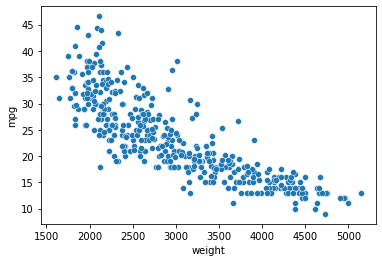

In [2]:
# Load data mpg
mpg_df = sns.load_dataset("mpg")

ax = sns.scatterplot(x="weight", y="mpg", data=mpg_df)

In [ ]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [14]:
print(sns.scatterplot.__doc__)

Draw a scatter plot with possibility of several semantic groupings.

The relationship between ``x`` and ``y`` can be shown for different subsets
of the data using the ``hue``, ``size``, and ``style`` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
``hue`` and ``style`` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The default treatment of the ``hue`` (and to a lesser extent, ``size``)
semantic, if present, depends on whether the variable is inferred to
represent "numeric" or "categorical" data. In particular, numeric variables
are represented with a sequential colormap by default, and the legend
entries show regular "ticks" with val

### Hexagonal Binning jointplot(kind ="hex", ...)

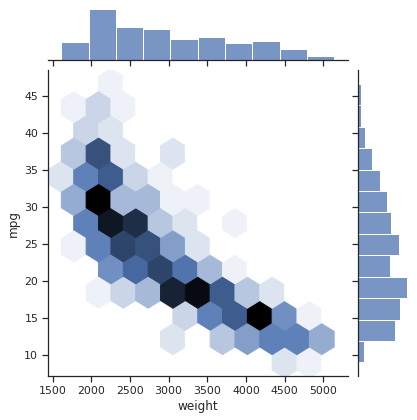

In [ ]:
sns.jointplot(mpg_df.weight, mpg_df.mpg, kind="hex")

### Contour (kdeplot)

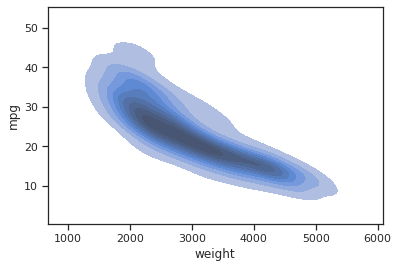

In [ ]:
# sns.kdeplot(mpg_df.weight, mpg_df.mpg, shade=True)

### Lines (lineplot)

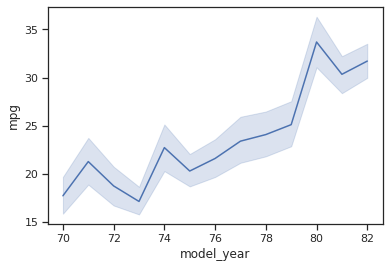

In [ ]:
sns.lineplot(x="model_year", y="mpg", data=mpg_df)

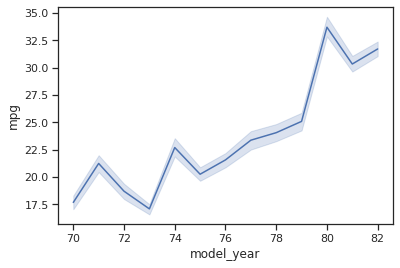

In [ ]:
#Thay đổi mức độ tin cậy (confidence interval)
sns.lineplot(x="model_year", y="mpg", data=mpg_df, ci=50)

In [ ]:
# Multiple Line
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


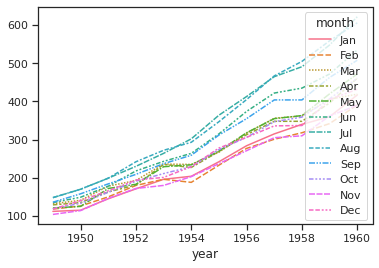

In [ ]:
sns.lineplot(data=flights_wide)

### Heatmap (heatmap, clustermap)

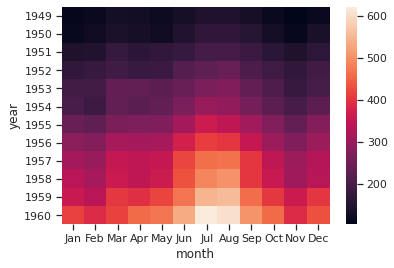

In [ ]:
sns.heatmap(flights_wide)

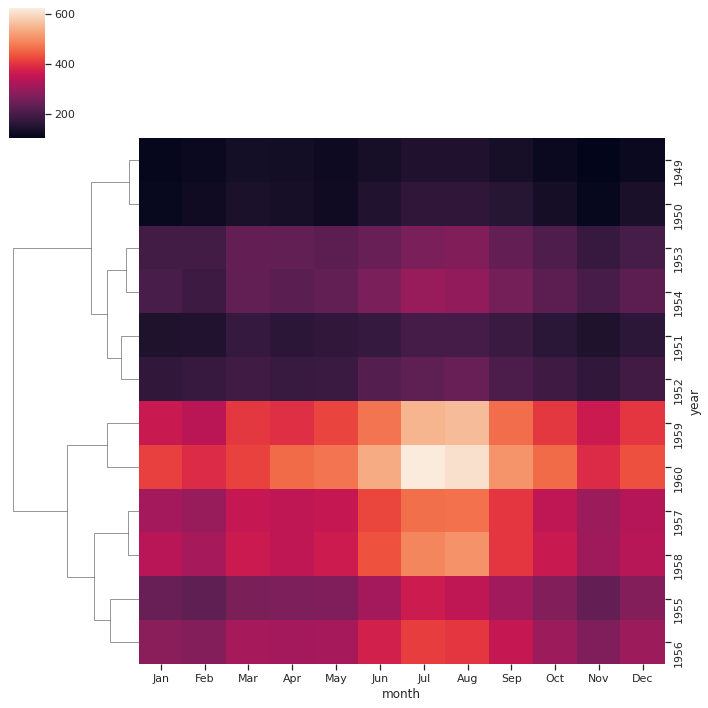

In [ ]:
# clustermap
sns.clustermap(flights_wide, col_cluster=False, row_cluster=True)

## Summary Statistics

###Histogram (distplot)

In [ ]:
mpg_df = sns.load_dataset("mpg")

# import numpy as np

In [ ]:
mpg_df['weight']

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64

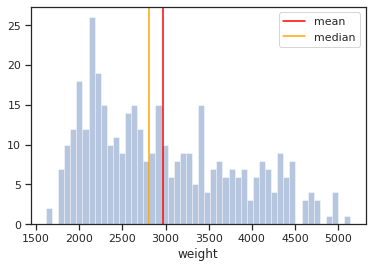

In [ ]:
ax = sns.distplot(mpg_df.weight, bins=50, kde=False)

plt.axvline(x=np.mean(mpg_df.weight), color='red', label='mean')
plt.axvline(x=np.median(mpg_df.weight), color='orange',
label='median')
plt.legend(loc='upper right')

### Box (boxplot)

In [ ]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
102//10

10

In [ ]:
int(np.floor(102/10))
# dtype=float

10

In [ ]:
np.floor(mpg_df.model_year/10)*10

In [ ]:
mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,model_decade
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,80
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,80
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,80
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,80
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,80


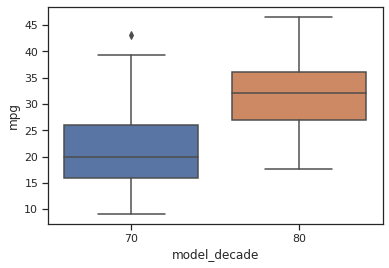

In [ ]:
sns.boxplot(x='model_decade', y='mpg', data=mpg_df)


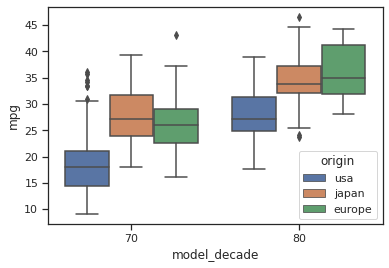

In [ ]:
sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')


### Violin (violinplot)

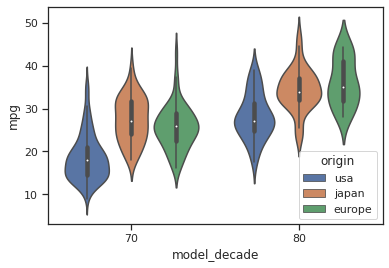

In [ ]:
sns.violinplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')


## Bài tập

1. Load data ('COVID-19.csv') và trích lấy dữ liệu các cột sau: 'day','month','year','cases', 'deaths', 'countriesAndTerritories', 'continentExp' ( trích data này là data để thực hiện các yêu cầu dưới).

2. Tạo các data sau:
* * Tổng số "cases" và "deaths" theo từng ngày. (bắt đầu từ ngày 01/01/2020).
* * Tổng số "cases" và "deaths" theo từng tháng. (bắt đầu từ tháng 01/2020).
* * Tổng số "cases" và "deaths" theo từng quốc gia.

**Đối với những câu vẽ thì luôn phải có "Nhận xét" về các biểu đồ/ đồ thị đã vẽ. "Giải thích" vì sao lại ưu tiên biểu đồ/ đồ thị đó trong từng data (Đồ thị/ biểu đồ nào vẽ trước thì ưu tiên trước)**.

3. Tương ứng với từng data trên, vẽ các đồ thị/ biểu đồ(ít nhất 3) sao cho các bạn nghĩ các đồ thị đó phù hợp nhất để mô tả "global pattern" về "cases" và "deaths".

4. Vẽ các đồ thị sao cho bạn nghĩ các đồ thị/ biểu đồ đó phù hợp nhất để mô tả "summary statistics" về đặc điểm của tổng số "cases" và tổng số "deaths" theo từng tháng và được phân tách theo từng khu vực.

5. Trích data của nước Việt Nam (bắt đầu từ 01/01/2020)

* * Thông kê Tổng số "cases" và "deaths" theo từng ngày, vẽ đồ thị/biểu đồ thích hợp để mô tả về "cases" và "deaths".

* * Thông kê Tổng số "cases" và "deaths" theo từng tháng, vẽ đồ thị/biểu đồ thích hợp để mô tả về "cases" và "deaths".